In [8]:
# Libraries needed for web-scraping
from bs4 import BeautifulSoup
import pandas as pd # will use to store the data from the webpage
import requests #library required for web-scrapping
import matplotlib.pyplot as plt #library requiered for plotting 
import numpy as np

In [9]:
#create of empty lists for naming dataset columns in next steps 
crypto_name_list = []
crypto_market_cap_list = []
crypto_price_list = []
crypto_circulating_supply_list = []
crypto_symbol_list = []
crypto_date_df_list =[]
date_list = []

#cration of dataframe called "df"
df = pd.DataFrame()

In [10]:
#create list for a range of dates to scrap
for date_for_scrapping in range(20220901,20220931):
    date_list.append(date_for_scrapping)

In [11]:
#convert 
df_fechas = pd.DataFrame()
df_fechas['fecha'] = date_list
df_fechas['fecha'].astype(str)
df_fechas['url'] = 'https://coinmarketcap.com/historical/'
df_fechas['fecha_url']= df_fechas.url.str.cat(df_fechas.fecha.astype(str))
url_scrapping = df_fechas.fecha_url.tolist()
url_scrapping


['https://coinmarketcap.com/historical/20220901',
 'https://coinmarketcap.com/historical/20220902',
 'https://coinmarketcap.com/historical/20220903',
 'https://coinmarketcap.com/historical/20220904',
 'https://coinmarketcap.com/historical/20220905',
 'https://coinmarketcap.com/historical/20220906',
 'https://coinmarketcap.com/historical/20220907',
 'https://coinmarketcap.com/historical/20220908',
 'https://coinmarketcap.com/historical/20220909',
 'https://coinmarketcap.com/historical/20220910',
 'https://coinmarketcap.com/historical/20220911',
 'https://coinmarketcap.com/historical/20220912',
 'https://coinmarketcap.com/historical/20220913',
 'https://coinmarketcap.com/historical/20220914',
 'https://coinmarketcap.com/historical/20220915',
 'https://coinmarketcap.com/historical/20220916',
 'https://coinmarketcap.com/historical/20220917',
 'https://coinmarketcap.com/historical/20220918',
 'https://coinmarketcap.com/historical/20220919',
 'https://coinmarketcap.com/historical/20220920',


In [12]:
try:
    def scrape ():# define the function
        for URLh1 in url_scrapping:#name of web page for scrapping + date in YYYYMMDD format
            webpage = requests.get(URLh1)#making a request of coinmarket cap page
            if webpage.status_code == 200:#verify if there is any error
                s = BeautifulSoup(webpage.text, 'html.parser') #create a Beautiful soup with HTML as a parser
                tr = s.find_all('tr',attrs={'class':'cmc-table-row'}) #identify the row of table to scrap
                count = 0
                for row in tr:
                    if count == 20:# number of row to scrap
                        break;
                    count += 1
                    name_column = row.find('td', attrs = {'cmc-table__cell cmc-table__cell--sticky cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__name'})
                    crypto_name = name_column.find('a', attrs={'class':'cmc-table__column-name--name cmc-link'}).text.strip()
                    crypto_market_cap = row.find('td', attrs={'class':'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__market-cap'}).text.strip()
                    crypto_price = row.find('td', attrs={'class':'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__price'}).text.strip()
                    crypto_circulating_supply_symb = row.find('td', attrs={'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__circulating-supply'}).text.strip()
                    crypto_circulating_supply = crypto_circulating_supply_symb.split(' ')[0]
                    crypto_symbol = crypto_circulating_supply_symb.split(' ')[1]
                    crypto_date = s.find('h1', attrs={'class':'sc-2e4c66fd-0 eYjtny cmc-historical-detail__title'}).getText()
                    #append the values to the lists
                    crypto_name_list.append(crypto_name)
                    crypto_market_cap_list.append(crypto_market_cap)
                    crypto_price_list.append(crypto_price)
                    crypto_circulating_supply_list.append(crypto_circulating_supply)
                    crypto_symbol_list.append(crypto_symbol)
                    crypto_date_df_list.append(crypto_date)
                    
                    
except Exception as e:
    print ('request Error')
    print(e)
    print('\n')

In [13]:
scrape () #funtion is executed

In [14]:
#create columns in dataframe "df" with the lists from scrapping
df['Name'] = crypto_name_list
df['Market_cap']=crypto_market_cap_list
df['price']=crypto_price_list
df['circulating_supply']=crypto_circulating_supply_list
df['symbol']=crypto_symbol_list
# eliminate the "$" simbol to convert as a number (price field)
df['price'] = df.price.str.replace('$',"")
df['price'] = df.price.str.replace(',',"").astype('float')
# eliminate the "$" simbol to convert as a number (Market_cap field)
df['Market_cap'] = df.Market_cap.str.replace('$',"")
df['Market_cap'] = df.Market_cap.str.replace(',',"").astype('float')
pd.DataFrame(df)
df['Date'] = crypto_date_df_list
df['Date'] = df.Date.str.replace('Historical Snapshot - ', "")
df.head

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # This is added back by InteractiveShellApp.init_path()


<bound method NDFrame.head of                 Name    Market_cap     price circulating_supply symbol  \
0            Bitcoin  3.852083e+11  20127.14         19,138,750    BTC   
1           Ethereum  1.938345e+11   1586.18        122,202,301    ETH   
2             Tether  6.755111e+10      1.00     67,550,404,113   USDT   
3           USD Coin  5.202630e+10      1.00     52,027,528,034   USDC   
4                BNB  4.491907e+10    278.42        161,337,261    BNB   
..               ...           ...       ...                ...    ...   
595        Avalanche  5.089442e+09     17.20        295,963,244   AVAX   
596          Uniswap  4.916393e+09      6.45        762,209,327    UNI   
597  Wrapped Bitcoin  4.756996e+09  19427.69            244,856   WBTC   
598     UNUS SED LEO  3.996808e+09      4.19        953,954,130    LEO   
599         Litecoin  3.806393e+09     53.40         71,284,731    LTC   

                  Date  
0    01 September 2022  
1    01 September 2022  
2    0

Text(0.5, 1.0, 'Top criptomonedas por cap de mercado')

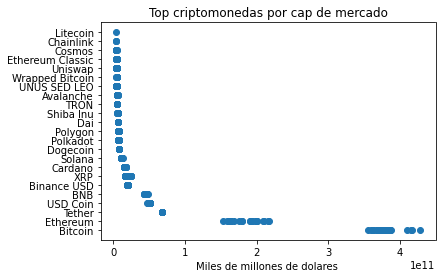

In [18]:
plt.scatter(df.Market_cap, df.Name)
plt.xlabel("Miles de millones de dolares ")
plt.title("Top criptomonedas por cap de mercado")

In [16]:
df.to_csv('top cryto2.csv') 